Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [1]:
# uncomment the code below and execute this cell
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)


Attaching package: 'palmerpenguins'


The following objects are masked from 'package:datasets':

    penguins, penguins_raw




Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

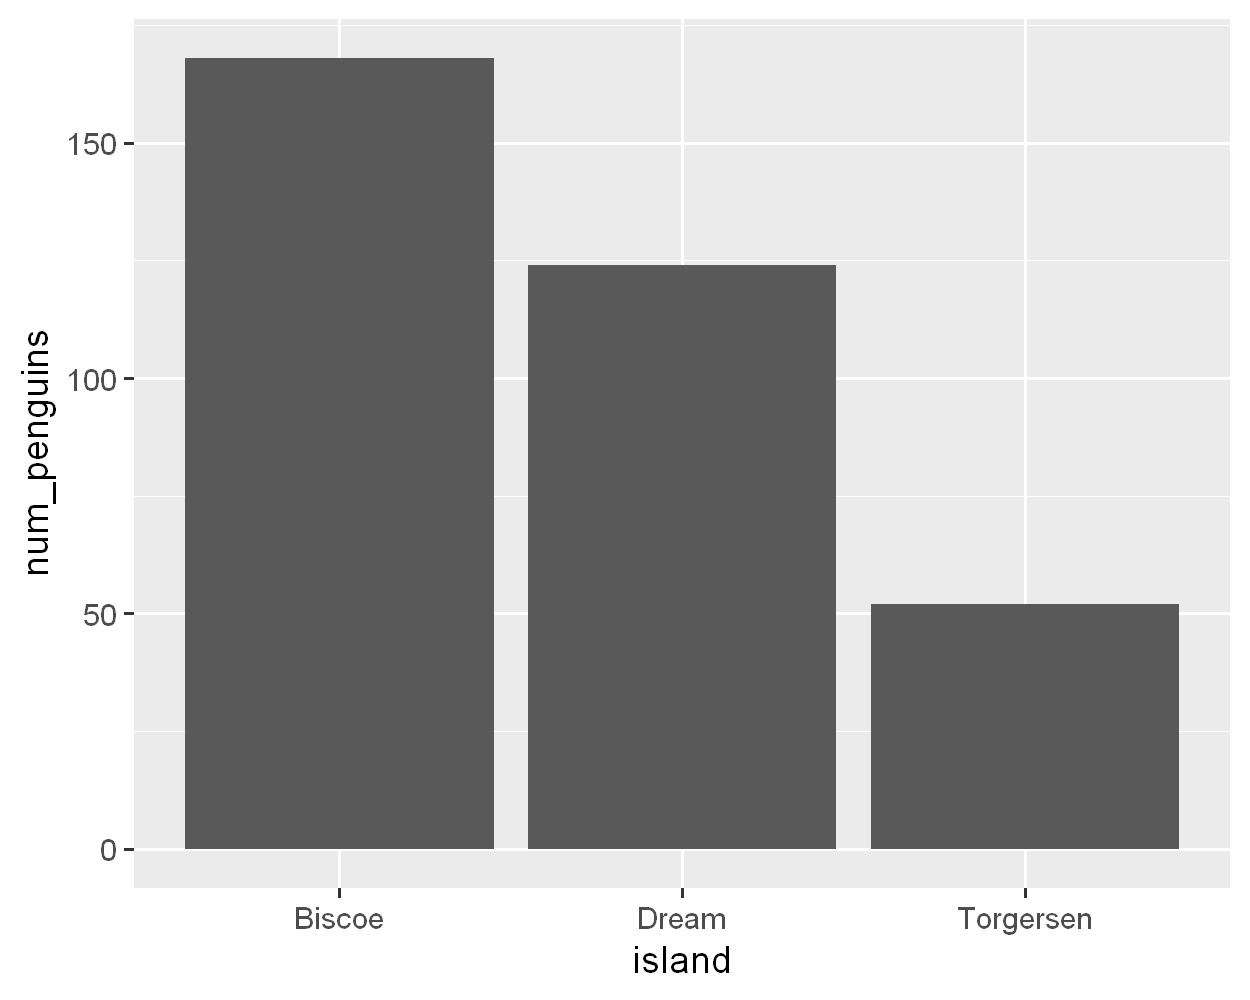

In [3]:
penguins |>
  group_by(island) |>
  summarize(num_penguins = n())  |>
  ggplot(aes(island, num_penguins)) +
  geom_col()

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

In [4]:
penguins |>
  filter(species == 'Adelie') |>
  group_by(island) |>
  summarize(count = n())

island,count
<fct>,<int>
Biscoe,44
Dream,56
Torgersen,52


> **Matt's Response:**
>
> Looks like the Adelie penguins can be observed on all 3 islands:
> 1. Biscoe
> 2. Dream
> 3. Torgersen

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_point()`)."


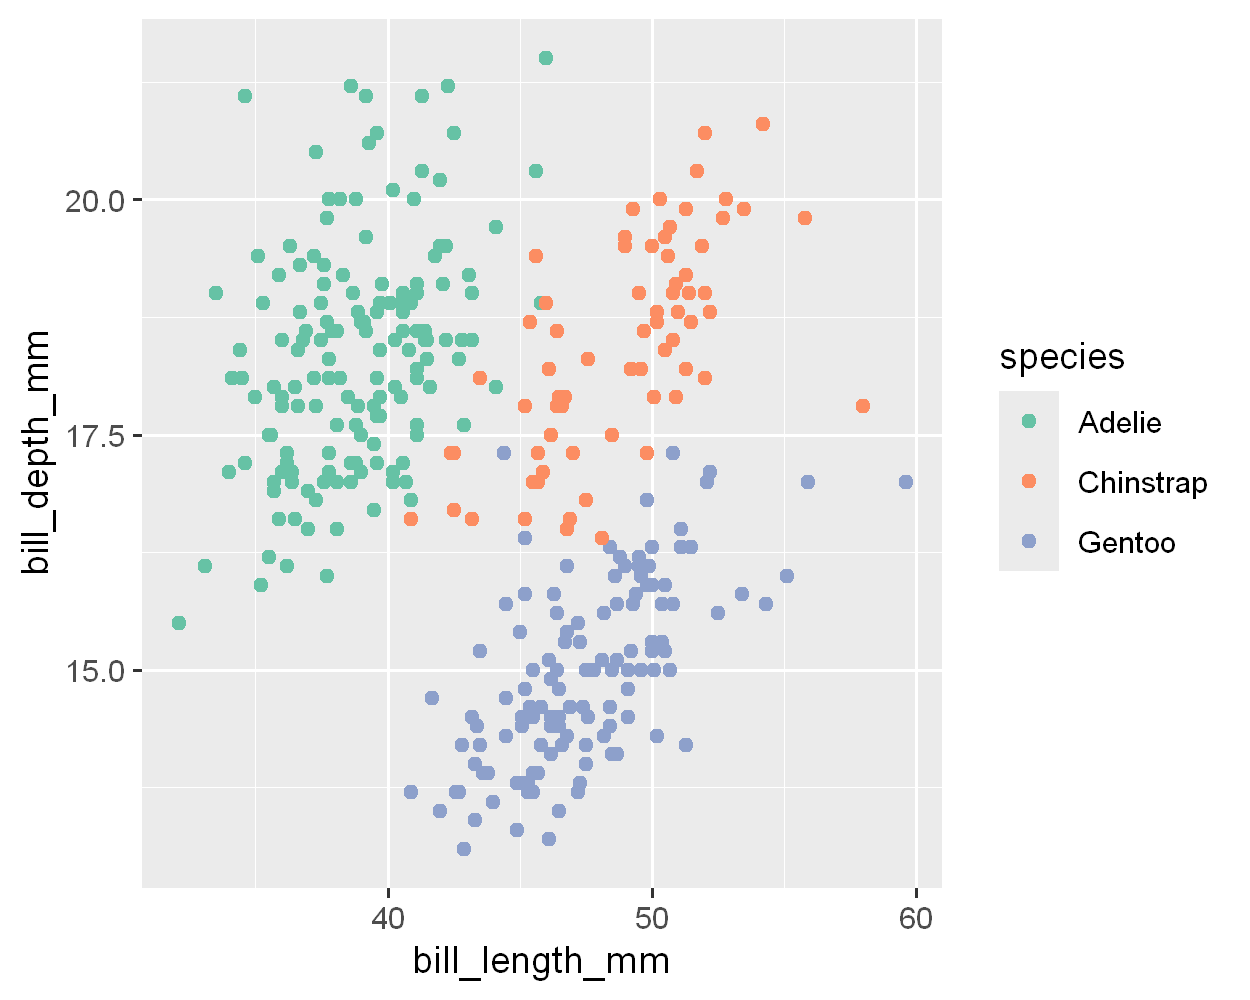

In [5]:
ggplot(penguins, aes(bill_length_mm, bill_depth_mm, color = species)) +
  geom_point() +
  scale_color_brewer(palette = "Set2")

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

In [ ]:
glimpse(penguins)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_bin()`)."


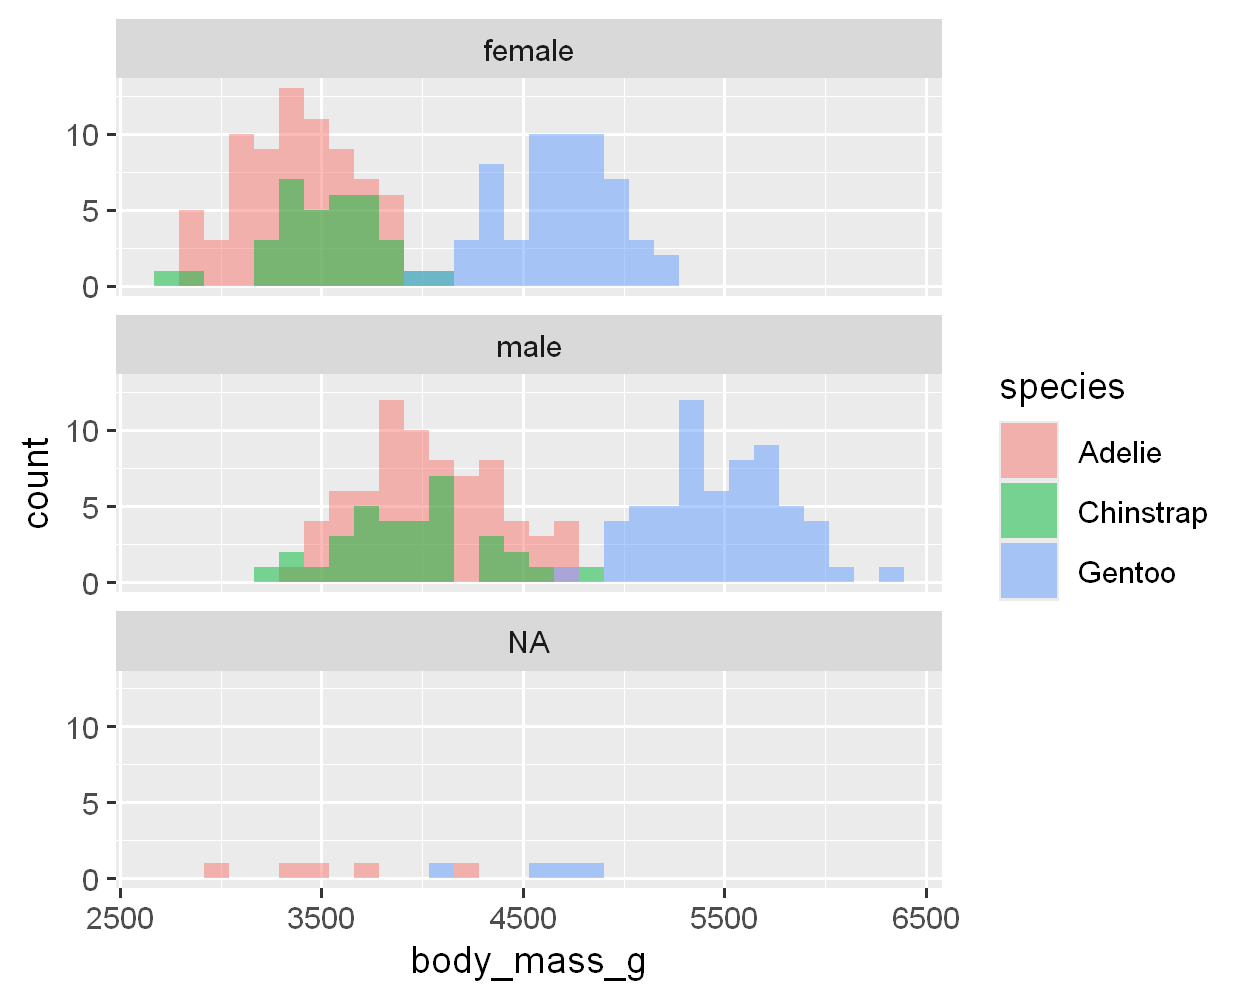

In [6]:
ggplot(penguins, aes(body_mass_g, fill = species)) +
  geom_histogram(position = 'identity', alpha = 0.5) +
  facet_wrap('sex', ncol = 1) +
  scale_color_brewer(palette = "Set2")

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_bin()`)."


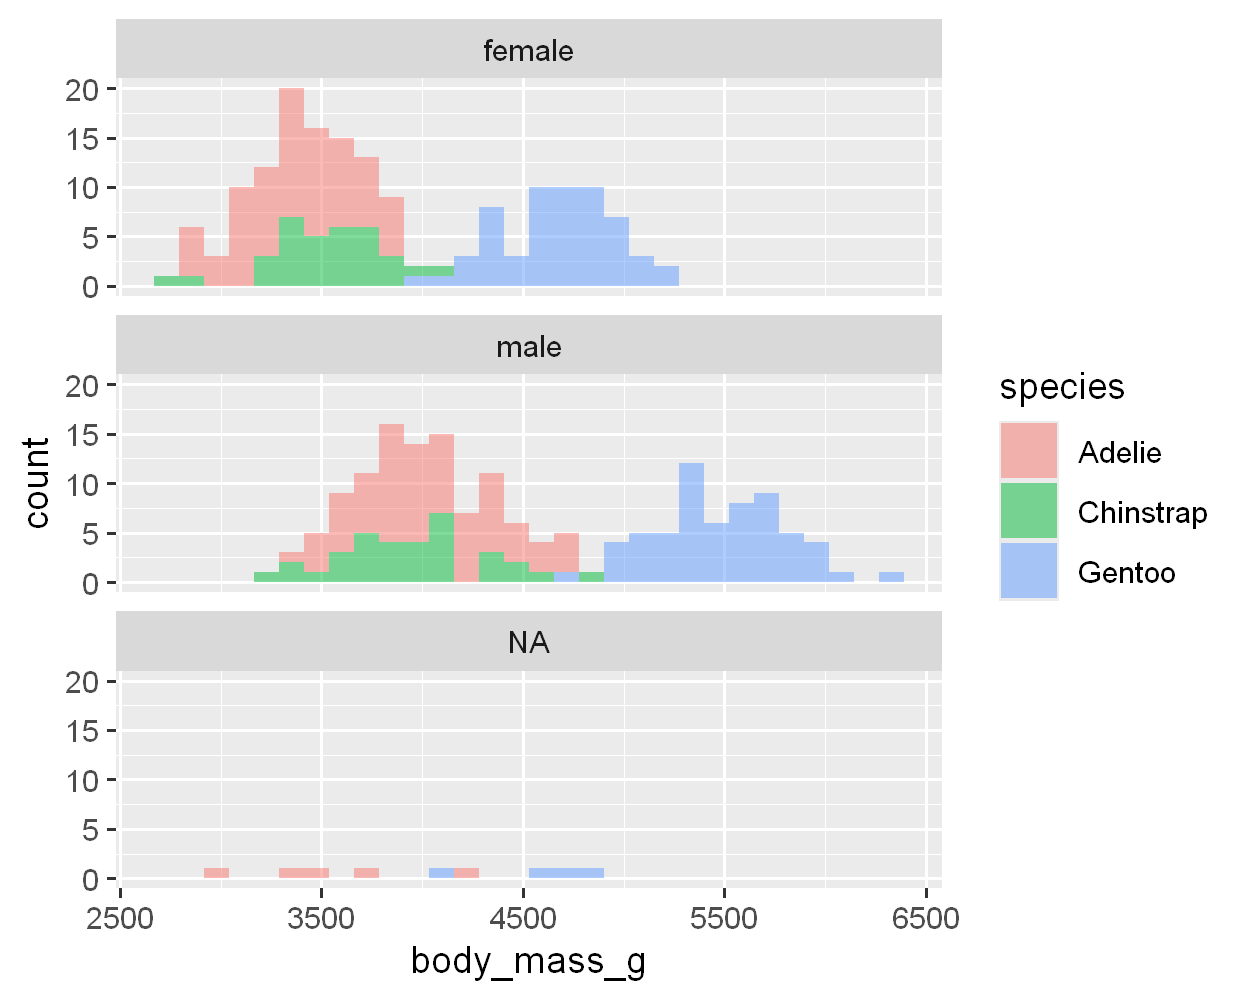

In [7]:
ggplot(penguins, aes(body_mass_g, fill = species)) +
  geom_histogram(alpha = 0.5) +
  facet_wrap('sex', ncol = 1) +
  scale_color_brewer(palette = "Set2")

> **Matt's Response:**
>
> It looks like it's trying to stack the bars on top of each other when they're
> in different species, when we omit the `position = 'identity'` argument.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [9]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [10]:
txhousing <- txhousing[!(names(txhousing) == 'inventory')]
head(txhousing)

city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene,2000,1,72,5380000,71400,701,2000.000
Abilene,2000,2,98,6505000,58700,746,2000.083
Abilene,2000,3,130,9285000,58100,784,2000.167
Abilene,2000,4,98,9730000,68600,785,2000.250
Abilene,2000,5,141,10590000,67300,794,2000.333
Abilene,2000,6,156,13910000,66900,780,2000.417


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [ ]:
dallas_sub <- txhousing |>
  filter(city == 'Dallas', (year == 2012) | (year == 2013) )
dallas_sub |> head()

city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2012,1,2555,509458081,150800,16721,2012.000
Dallas,2012,2,3085,634067291,157100,17173,2012.083
Dallas,2012,3,4068,898320563,167300,17433,2012.167
Dallas,2012,4,4291,983333297,168700,17632,2012.250
Dallas,2012,5,5004,1175419749,175100,17726,2012.333
Dallas,2012,6,5196,1209024869,177900,17587,2012.417


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [12]:
dallas_sub <- dallas_sub |>
  mutate(prct_sold = sales / listings * 100)

dallas_sub |> head()

city,year,month,sales,volume,median,listings,date,prct_sold
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2012,1,2555,509458081,150800,16721,2012.000,15.28019
Dallas,2012,2,3085,634067291,157100,17173,2012.083,17.96425
Dallas,2012,3,4068,898320563,167300,17433,2012.167,23.33505
Dallas,2012,4,4291,983333297,168700,17632,2012.250,24.33643
Dallas,2012,5,5004,1175419749,175100,17726,2012.333,28.22972
Dallas,2012,6,5196,1209024869,177900,17587,2012.417,29.54455


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [13]:
dallas_summary <- dallas_sub |>
  group_by(year, month) |>
  summarize(avg_prct_sold = sum(sales) / sum(listings) * 100)

dallas_summary |> head()

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


year,month,avg_prct_sold
<int>,<int>,<dbl>
2012,1,15.28019
2012,2,17.96425
2012,3,23.33505
2012,4,24.33643
2012,5,28.22972
2012,6,29.54455


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [14]:
dallas_summary |> tibble() |> slice_max(avg_prct_sold, n = 3)

year,month,avg_prct_sold
<int>,<int>,<dbl>
2013,5,48.17364
2013,7,46.19657
2013,8,45.34103


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [15]:
txhousing |>
  filter(year == 2012 | year == 2013, city == "Dallas") |>
  mutate(prct_sold = sales/listings *100) |>
  group_by(month) |>
  summarize(mean_prct_sold = mean(prct_sold)) |>
  slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


> **Matt's Response:***
> 
> Here's what happens though this process:
> 
> 1. We first by piping the `txhousing` to the next function in the pipeline
> 2. The data is filtered with the conditions:
>    1. The year must be 2012 OR 2013
>    2. The city must be Dallas
> 3. The data is split into groups by month
> 4. The data is summarized by `mean_prct_sold`, which is calculated as the mean
>    of the `prct_sold` field.
> 5. The data is sliced to only include the top 3 values of `mean_prct_sold`.